In [78]:
import os, sys, json
# set random seeds
import numpy as np
np.random.seed(0)
import random as rn
rn.seed(0)

In [79]:
import pandas as pd

In [80]:
path_read = "./data/combined_data.csv"
# read df from csv
df = pd.read_csv(path_read)

In [81]:
len(df)

50000

In [82]:
df

,text,gt_label,multiclass_predicted_label,single_class_logit_score,polar_radius,polar_theta,polar_theta_deg,pos_loss,neg_loss,base_loss
0,I got 'new' tires from them and within two wee...,0,0,0.000179,0.893337,0.679533,38.934379,3.637170,3.423840,4.001163
1,Don't waste your time. We had two different p...,0,0,0.000444,0.519094,0.626527,35.897380,3.356954,3.033727,4.223260
2,All I can say is the worst! We were the only 2...,0,0,0.000043,0.889150,0.656323,37.604547,3.785630,3.524564,4.136008
3,I have been to this restaurant twice and was d...,0,0,0.000004,0.875254,0.552706,31.667748,3.353036,2.869883,3.647495
4,Food was NOT GOOD at all! My husband & I ate h...,0,0,0.000013,0.799081,0.636228,36.453198,3.176172,2.873306,3.618195
...,...,...,...,...,...,...,...,...,...,...
49995,Just wanted to write a review to chip in with ...,0,1,0.002904,1.133103,0.709637,40.659229,3.798547,3.646442,3.949870
49996,Great ambience. Great drinks. Great food. I lo...,4,4,0.999981,0.720631,1.152153,66.013533,2.362278,3.172081,3.590026
49997,I have been to the other Monks locations so I ...,3,3,0.999862,0.655790,0.838733,48.055875,3.373806,3.480679,4.198580
49998,Don't go here. I know you might want to try i...,1,1,0.001741,0.883173,0.654348,37.491350,3.848746,3.583591,4.204350


### Generate random examples for ground truth label

In [83]:
### Find all unique values of gt_label column
unique_gt_labels = df['gt_label'].unique()
unique_gt_labels

array([0, 2, 1, 3, 4])

In [84]:
# for each unique value in gt_label column, sample 2 random rows
sampled_rows = []
for label in unique_gt_labels:
    label_rows = df[df['gt_label'] == label].sample(2)

    # drop all rows except text, gt_label, polar_theta_deg, polar_radius
    label_rows = label_rows[['text', 'gt_label', 'polar_theta_deg', 'polar_radius']]
    # convert to dict
    label_rows_dict = label_rows.to_dict(orient='records')
    sampled_rows.extend(label_rows_dict)

In [85]:
with open("sampled_rows_gt_label.json", "w") as f:
    json.dump(sampled_rows, f, indent=4)

### Generate random examples for ground truth label


In [86]:
# remove all columns except text, gt_label, polar_theta_deg, polar_radius
df = df[['text', 'gt_label', 'polar_theta_deg', 'polar_radius']]

In [87]:
json_arr = []
for index, row in df.iterrows():
    json_arr.append(row.to_dict())

<Axes: xlabel='polar_theta_deg', ylabel='polar_radius'>

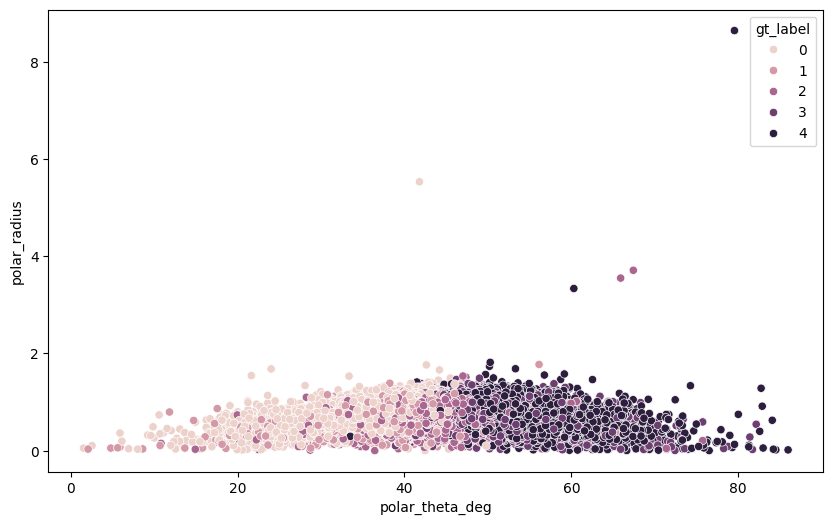

In [88]:
# plot distribution of polar_theta_deg vs polar_radius
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='polar_theta_deg', y='polar_radius', hue='gt_label')

In [89]:
df.describe()

,gt_label,polar_theta_deg,polar_radius
count,50000.000000,49995.000000,49995.000000
mean,2.000000,45.235504,0.787358
std,1.414228,7.602492,0.214281
min,0.000000,1.524891,0.000213
25%,1.000000,40.137601,0.662483
50%,2.000000,45.332787,0.806128
75%,3.000000,50.222666,0.932669
max,4.000000,85.978161,8.645297


<Axes: xlabel='polar_radius', ylabel='Count'>

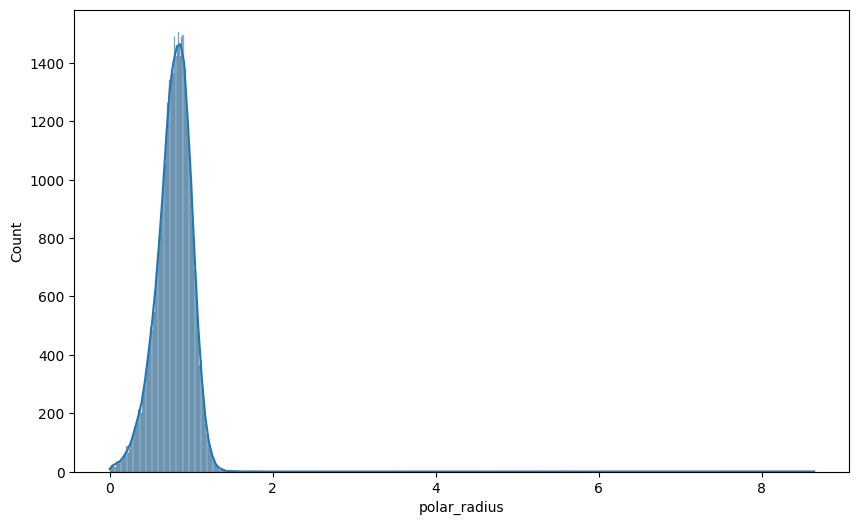

In [90]:
# plot distribution of polar_radius
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='polar_radius',kde=True)

In [91]:
theta_intervals = [
    [0, 5],
    [5, 30],
    [30, 40], 
    [40, 45], 
    [45, 50], 
    [50, 60], 
    [60, 85],
    [85, 90] 
]

radius_intervals = [
    [0, 0.1], 
    [0.1, 0.3], 
    [0.3, 0.5], 
    [0.5, 0.7], 
    [0.7, 1.0], 
    [1.0, 2.0], 
    [2.0, 4.0],
]

In [92]:
sampled_rows = []
for i, interval in enumerate(theta_intervals):
    start, end = interval
    filtered_df = df[(df['polar_theta_deg'] > start) & (df['polar_theta_deg'] < end)]
    for j, radius_interval in enumerate(radius_intervals):
        start, end = radius_interval
        filtered_df_2 = filtered_df[(filtered_df['polar_radius'] > start) & (filtered_df['polar_radius'] < end)]
        if len(filtered_df_2) == 0:
            continue
        max_len = min(2, len(filtered_df_2))
        sampled_row = filtered_df_2.sample(max_len)
        sampled_rows.append(sampled_row.to_dict(orient='records')[0])

In [93]:
sampled_rows

[{'text': 'Gross!',
  'gt_label': 0,
  'polar_theta_deg': 1.5248906501629105,
  'polar_radius': 0.0503884244831907},
 {'text': 'The worse service.',
  'gt_label': 0,
  'polar_theta_deg': 2.546954956501185,
  'polar_radius': 0.1021007063025109},
 {'text': 'Great food, but awful service.',
  'gt_label': 2,
  'polar_theta_deg': 15.823220467348548,
  'polar_radius': 0.064979348961822},
 {'text': "food isn't good",
  'gt_label': 1,
  'polar_theta_deg': 23.36064903395412,
  'polar_radius': 0.2997414461696728},
 {'text': 'Came here today. Got seated by the host and never got service! After about 20 mins of servers walking by and others being served that came in after we did we decided to leave.. Maybe we smelled bad???  but still gonna give it 1 star for being seated',
  'gt_label': 0,
  'polar_theta_deg': 29.467074786110004,
  'polar_radius': 0.4282352907205156},
 {'text': 'Went the first time and it was gross!! The server had a attitude. The only reason for 2 stars was for the nice lady who

In [94]:
len(sampled_rows)

40

In [95]:
with open("sampled_rows_theta_radius.json", "w") as f:
    json.dump(sampled_rows, f, indent=4)